In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [20]:
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [22]:
x = df.drop(['species'],axis=1) #feature
y = df['species'] #target

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 16)
print(x_train.shape)
print(x_test.shape)

(120, 4)
(30, 4)


In [24]:
from sklearn.metrics import classification_report , confusion_matrix
#pembuatan model SVC
model = SVC()

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuarcy :", model.score(x_test, y_test))
svc = model.score(x_test, y_test)
cr = classification_report(y_test, y_pred)
print(cr)

Training accuracy : 0.9916666666666667
Testing accuarcy : 0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.92      0.92      0.92        12
           2       0.88      0.88      0.88         8

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [28]:
x_new = df.iloc[:,:2]
y_new = y

In [31]:
x_new_train, x_new_test, y_new_train, y_new_test = train_test_split(x_new, y_new, test_size = 0.20, random_state = 16)
print(x_new_train.shape)
print(x_new_test.shape)

(120, 2)
(30, 2)


In [34]:
model_new = SVC(kernel='rbf', C=1, gamma='auto')

model_new.fit(x_new_train, y_new_train)
y_new_pred = model_new.predict(x_new_test)

print("Training accuracy :", model_new.score(x_new_train, y_new_train))
print("Testing accuarcy :", model_new.score(x_new_test, y_new_test))
svc = model_new.score(x_new_test, y_new_test)
cr = classification_report(y_new_test, y_new_pred)
print(cr)

Training accuracy : 0.85
Testing accuarcy : 0.7
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.67      0.50      0.57        12
           2       0.45      0.62      0.53         8

    accuracy                           0.70        30
   macro avg       0.71      0.71      0.70        30
weighted avg       0.72      0.70      0.70        30



In [41]:
import numpy as np
import pylab as pl
from sklearn import svm, datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2] # we only take the first two features. We could
                     # avoid this ugly slicing by using a two-dim dataset
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

svm_model = svm.SVC(kernel='poly', C=1, gamma='auto')

svm_model.fit(X_train, y_train)

svm_score = svm_model.score(X_test, y_test)
print('Model accuracy:', svm_score)

Model accuracy: 0.7555555555555555


E:\anaconda\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


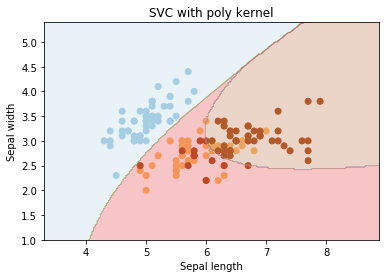

In [43]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with poly kernel')

plt.subplot(1, 1, 1)
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.25)